In [1]:
from bs4 import BeautifulSoup
import requests, lxml, re, json
from datetime import datetime
import json
import pandas as pd
import numpy as np

In [ ]:
##############################  cwiczeniowa czesc ###########################

In [4]:
headers = {
    "user-agent":
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
}


params = {
    "id": "com.duolingo",  
    "gl": "PL"  # country
}

In [ ]:
# pobieram id nazwy aplikacji do nauki jezykow

In [2]:
html_link = requests.get("https://play.google.com/store/apps/collection/cluster?clp=ogooCAEaHAoWcmVjc190b3BpY180UHEzNTdaaldCcxA7GAMqAggBUgIIAg%3D%3D:S:ANO1ljId2uE&gsr=CiuiCigIARocChZyZWNzX3RvcGljXzRQcTM1N1pqV0JzEDsYAyoCCAFSAggC:S:ANO1ljL2y1s", timeout=10).text
soup_link = BeautifulSoup(html_link, "lxml")
soup_link
nazwa_app = set(re.findall(r"<a href=\"/store/apps/details\?id=(.*?)\"",
                                           str(soup_link)))
nazwa_app

{'ai.mybuddy.talkingflashcards_new',
 'com.babbel.mobile.android.en',
 'com.calmid.learnandplay.launcher',
 'com.duolingo',
 'com.langlandia.langlandia',
 'com.lingvano.app',
 'com.memorize_by_heart',
 'com.mysigningtime',
 'com.pplingo.english',
 'com.simyasolutions.ling.bn',
 'com.sparkedu.sparkabc',
 'com.squins.tkl.en',
 'com.vkids.android.smartkidsenglishlite',
 'es.monkimun.lingokids',
 'me.mycake',
 'us.signall.learnfingerspell'}

In [ ]:
# pobieram zupe poszczegolnej aplikacji tutal duolingo. nastepnie w petli przerobie wszystkie aplikacje

In [5]:
html = requests.get("https://play.google.com/store/apps/details", params=params, headers=headers, timeout=10).text
soup = BeautifulSoup(html, "lxml")


<!DOCTYPE html>
<html dir="ltr" lang="en"><head><base href="https://play.google.com/"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1" name="viewport"/><link href="/opensearch.xml" rel="search" title="Google Play" type="application/opensearchdescription+xml"/><link href="//www.gstatic.com/android/market_images/web/favicon_v2.ico" rel="shortcut icon"/><script data-id="_gd" nonce="+1GTMGAHzMItPIQQnwb9mA">window.WIZ_global_data = {"DpimGf":false,"EP1ykd":["/_/*","/covid19/exposurenotifications/select","/covid19/exposurenotifications/select/*","/store/ereview","/store/ereview/","/store/linkbuilder","/store/linkbuilder/","/store/movies/device","/store/movies/device/","/web/store/ereview","/web/store/ereview/","/web/store/linkbuilder","/web/store/linkbuilder/","/web/store/movies/device","/web/store/movies/device/"],"FdrFJe":"-6558758965913536984","G8C1sd":"%.@.[[true],null,[[[]]],null,null,null,null,[null,2],null,null,null,null,null,null,[1],null,n
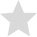
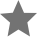
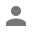
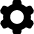
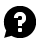
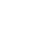
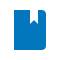
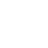
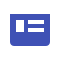
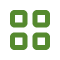
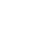
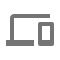
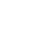
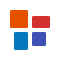
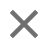
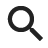
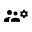
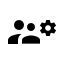
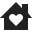
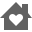
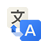
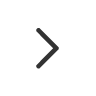
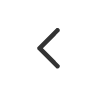
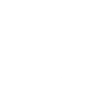
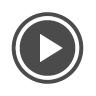
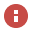
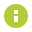
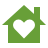
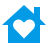
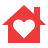
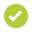
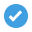
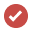
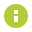

In [6]:
soup

In [7]:
soup.select("script")[12]

<script nonce="+1GTMGAHzMItPIQQnwb9mA" type="application/ld+json">{"@context":"https://schema.org","@type":"SoftwareApplication","name":"Duolingo: language lessons","url":"https://play.google.com/store/apps/details/Duolingo_language_lessons?id\u003dcom.duolingo\u0026hl\u003den_US\u0026gl\u003dPL","description":"Learn a new language with the world’s most-downloaded education app! Duolingo is the fun, free app for learning 35+ languages through quick, bite-sized lessons. Practice speaking, reading, listening, and writing to build your vocabulary and grammar skills. \n\nDesigned by language experts and loved by hundreds of millions of learners worldwide, Duolingo helps you prepare for real conversations in Spanish, French, Chinese, Italian, German, English, and more.\n\nWhether you’re learning a language for travel, school, career, family and friends, or your brain health, you’ll love learning with Duolingo.\n\nWhy Duolingo?\n★ Duolingo is fun and effective. Game-like lessons and fun char

In [8]:
basic_app_info = json.loads(re.findall(r"<script nonce=\".*\" type=\"application/ld\+json\">(.*?)</script>",
                                           str(soup.select("script")[12]), re.DOTALL)[0])
basic_app_info

{'@context': 'https://schema.org',
 '@type': 'SoftwareApplication',
 'name': 'Duolingo: language lessons',
 'url': 'https://play.google.com/store/apps/details/Duolingo_language_lessons?id=com.duolingo&hl=en_US&gl=PL',
 'description': 'Learn a new language with the world’s most-downloaded education app! Duolingo is the fun, free app for learning 35+ languages through quick, bite-sized lessons. Practice speaking, reading, listening, and writing to build your vocabulary and grammar skills. \n\nDesigned by language experts and loved by hundreds of millions of learners worldwide, Duolingo helps you prepare for real conversations in Spanish, French, Chinese, Italian, German, English, and more.\n\nWhether you’re learning a language for travel, school, career, family and friends, or your brain health, you’ll love learning with Duolingo.\n\nWhy Duolingo?\n★ Duolingo is fun and effective. Game-like lessons and fun characters help you build solid speaking, reading, listening, and writing skills.\

In [9]:
# ADDITIONAL INFORMATION
ADDITIONAL_INFORMATION = re.findall(r"div class=\"hAyfc\"><div class=\"BgcNfc\">(.*?)</div><span class=\"htlgb\"><div class=\"IQ1z0d\"><span class=\"htlgb\">(.*?)</span></div></span></div>",
                                           str(soup))
dict(ADDITIONAL_INFORMATION)

{'Updated': 'March 29, 2022',
 'Size': 'Varies with device',
 'Installs': '100,000,000+',
 'Current Version': 'Varies with device',
 'Requires Android': 'Varies with device',
 'Content Rating': '<div>PEGI 3</div><div><a href="https://support.google.com/googleplay?p=appgame_ratings">Learn more</a></div>',
 'Interactive Elements': 'Users Interact, Digital Purchases',
 'In-app Products': 'PLN\xa04.79 - PLN\xa0729.99 per item',
 'Permissions': '<div jsaction="click:UMmHgd(Hly47e)"><a class="hrTbp" jsname="Hly47e">View details</a></div>',
 'Report': '<a href="https://support.google.com/googleplay/?p=report_content" target="_blank">Flag as inappropriate</a>',
 'Offered By': 'Google Commerce Ltd'}

In [ ]:
###cechy z strony aplikacji https://play.google.com/store/apps/details?id=uk.co.bbc.learningenglish

In [54]:
    app_name = basic_app_info["name"]
    app_type = basic_app_info["@type"]
    app_url = basic_app_info["url"]
    app_description = basic_app_info["description"].replace("\n", "")  # replace new line character to nothing
    app_category = basic_app_info["applicationCategory"]
    app_operating_system = basic_app_info["operatingSystem"]
    app_main_thumbnail = basic_app_info["image"]

    app_content_rating = basic_app_info["contentRating"]
    app_rating = round(float(basic_app_info["aggregateRating"]["ratingValue"]), 1)  # 4.287856 -> 4.3
    app_reviews = basic_app_info["aggregateRating"]["ratingCount"]

    app_author = basic_app_info["author"]["name"]
    app_author_url = basic_app_info["author"]["url"]

In [10]:
app_name = basic_app_info["name"]
app_name

'Duolingo: language lessons'

In [195]:
# komentarze uzytkownikow 
app_user_comments = []

app_user_reviews_data = re.findall(r"(\[\"gp.*?);</script>",
                                       str(soup.select("script")), re.DOTALL)
app_user_reviews_data

['["gp:AOqpTOEhi_9sDWlUHXDtxuqb02nONAuMqp4jqnWje_rASmAUFd6WtxQDMu3Wyps8g20dqPlo3Rp8qC3o98G6Zw",["Bogdan",[null,2,null,[null,null,"https://play-lh.googleusercontent.com/a/AATXAJwjoZHUAk9lVovFzHAAduOI1-k0v-S_9uQWVSur\\u003dmo"]]],4,null,"Game is fun but tutorial is slow and terrible. Unskipable and really long tutorial.",[1644196577,208000000],1,null,null,["116810200643756763104","Bogdan",null,[[null,2,null,[null,null,"https://play-lh.googleusercontent.com/a/AATXAJwjoZHUAk9lVovFzHAAduOI1-k0v-S_9uQWVSur\\u003dmo"]],true],[null,2,null,[null,null,"https://play-lh.googleusercontent.com/Yq7oyNIvAAkuc69fG51sbAQS4otJxbObbt3xdr8tXxXyUdq4tVGtfgeKuptveGdP1srxaHVrNPzOYcfaEQ"]]],"3.0.24"],["gp:AOqpTOFRQYKWAGmXjC4Iu5JkNKqf7cPrwiQrbVh2LGNI1FKksT7VjmrVpuR_xUUin8mrl4RGOL_YGx8KqhosbA",["Pure Vanilla",[null,2,null,[null,null,"https://play-lh.googleusercontent.com/a/AATXAJyZCCsyNmT9qtkbhPTj-42FDceWtiBwsndrvv6f\\u003dmo"]]],2,null,"i mean, this game is super cool but the problem is that..: 1. the story is u

In [ ]:
###################################------------------############################

In [320]:
# DODATKOWE INFORMACJE ze https://play.google.com/store/apps/details?id=uk.co.bbc.learningenglish
ADDITIONAL_INFORMATION = dict(re.findall(r"div class=\"hAyfc\"><div class=\"BgcNfc\">(.*?)</div><span class=\"htlgb\"><div class=\"IQ1z0d\"><span class=\"htlgb\">(.*?)</span></div></span></div>",
                                           str(soup)))
ADDITIONAL_INFORMATION

{'Updated': 'December 1, 2021',
 'Size': 'Varies with device',
 'Installs': '100,000,000+',
 'Current Version': '3.0.24',
 'Requires Android': '4.4 and up',
 'Content Rating': '<div>PEGI 3</div><div><a href="https://support.google.com/googleplay?p=appgame_ratings">Learn more</a></div>',
 'Interactive Elements': 'Digital Purchases',
 'In-app Products': 'PLN\xa047.99 per item',
 'Permissions': '<div jsaction="click:UMmHgd(Hly47e)"><a class="hrTbp" jsname="Hly47e">View details</a></div>',
 'Report': '<a href="https://support.google.com/googleplay/?p=report_content" target="_blank">Flag as inappropriate</a>',
 'Offered By': 'Google Commerce Ltd',
 'Developer': '<div><a class="hrTbp" href="https://supermariorun.com/">Visit website</a></div><div><a class="hrTbp euBY6b" href="mailto:supermariorun-support@nintendo.co.jp">supermariorun-support@nintendo.co.jp</a></div><div><a class="hrTbp" href="https://supermariorun.com/app_privacy_policy/">Privacy Policy</a></div><div>京都府京都市南区上鳥羽鉾立町11-1</div>'

In [ ]:
###############################   projekt juz nie testowy ############################
# pobieram dane z najbardziej dochodowych aplikacji w sklepie google play


In [13]:
#najbardziej dochodowe aplikacje
html_link = requests.get("https://play.google.com/store/apps/collection/cluster?clp=0g4fCh0KF3RvcGdyb3NzaW5nX0FQUExJQ0FUSU9OEAcYAw%3D%3D:S:ANO1ljLe6QA&gsr=CiLSDh8KHQoXdG9wZ3Jvc3NpbmdfQVBQTElDQVRJT04QBxgD:S:ANO1ljKx5Ik", timeout=10).text
soup_link = BeautifulSoup(html_link, "lxml")
soup_link
nazwa_app = list(set(re.findall(r"<a href=\"/store/apps/details\?id=(.*?)\"",
                                           str(soup_link))))

# nazwa_app = list(set(nazwa_app))  #pozbywam sie dubli

zbior = pd.DataFrame([])
# pd.DataFrame( columns=['app_name', 'app_type', 'app_url', 'app_main_thumbnail',
#        'app_description', 'app_content_rating', 'app_category',
#        'app_operating_system', 'app_rating', 'app_reviews', 'app_author',
#        'app_author_url', 'Updated', 'Size', 'Installs', 'In_app_Products',
#        'Offered_By'])

headers = {
    "user-agent":
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.71 Safari/537.36"
}

#przerabiam wszystkie najbardziej dochodowe app
for x in range(len(nazwa_app[:-1])):
    params = {"id": nazwa_app[x], "gl": "PL"}
    
    def scrape_google_store_app():
        html = requests.get("https://play.google.com/store/apps/details", params=params, headers=headers, timeout=10).text
        soup = BeautifulSoup(html, "lxml")

        # pusty df 
        app_data = []

        #[12] podstawowe info w tym indeksie. nie zmienia sie sie index 12
        basic_app_info = json.loads(re.findall(r"<script nonce=\".*\" type=\"application/ld\+json\">(.*?)</script>",
                                               str(soup.select("script")[12]), re.DOTALL)[0])

        app_name = basic_app_info["name"]
        app_type = basic_app_info["@type"]
        app_url = basic_app_info["url"]
        app_description = basic_app_info["description"].replace("\n", "")
        app_category = basic_app_info["applicationCategory"]
        app_operating_system = basic_app_info["operatingSystem"]
        app_main_thumbnail = basic_app_info["image"]

        app_content_rating = basic_app_info["contentRating"]
#         app_rating = round(float(basic_app_info["aggregateRating"]["ratingValue"]), 1)  
        app_reviews = basic_app_info["aggregateRating"]["ratingCount"]

        app_author = basic_app_info["author"]["name"]
        app_author_url = basic_app_info["author"]["url"]



        # ADDITIONAL INFORMATION
        ADDITIONAL_INFORMATION = dict(re.findall(r"div class=\"hAyfc\"><div class=\"BgcNfc\">(.*?)</div><span class=\"htlgb\"><div class=\"IQ1z0d\"><span class=\"htlgb\">(.*?)</span></div></span></div>",
                                               str(soup)))

        Updated = ADDITIONAL_INFORMATION['Updated']
        Size = ADDITIONAL_INFORMATION['Size']
        Installs = ADDITIONAL_INFORMATION['Installs']
#         In_app_Products= ADDITIONAL_INFORMATION['In-app Products']
        Offered_By = ADDITIONAL_INFORMATION['Offered By']

        # User comments
        app_user_comments = []
        app_user_reviews_data = re.findall(r"(\[\"gp.*?);</script>",
                                           str(soup.select("script")), re.DOTALL)

        for review in app_user_reviews_data:
            user_name = re.findall(r"\"gp:.*?\",\s?\[\"(.*?)\",", str(review))
            user_avatar = [avatar.replace('"', "") for avatar in re.findall(r"\"gp:.*?\"(https.*?\")", str(review))]
            #pozbywam sie " oraz '
            user_comments = [comment.replace('"', "").replace("'", "") for comment in
                            re.findall(r"gp:.*?https:.*?]]],\s?\d+?,.*?,\s?(.*?),\s?\[\d+,", str(review))]


            # czas komentarza datetime.utcfromtimestamp(int(date)).date()  1644720519 -->(2022, 2, 13, 2, 48, 39)
            user_comment_date = [str(datetime.utcfromtimestamp(int(date))) for date in re.findall(r"\[(\d+),", str(review))]

            user_comment_id = [ids.replace('"', "") for ids in re.findall(r"\[\"(gp.*?),", str(review))]
            user_comment_likes = re.findall(r",?\d+\],?(\d+),?", str(review))
            user_comment_app_rating = re.findall(r"\"gp.*?https.*?\],(.*?)?,", str(review)) #ocena w komentarzu

            for name, avatar, comment, date, comment_id, likes, user_app_rating in zip(user_name,
                                                                                       user_avatar,
                                                                                       user_comments,
                                                                                       user_comment_date,
                                                                                       user_comment_id,
                                                                                       user_comment_likes,
                                                                                       user_comment_app_rating):
                app_user_comments.append({
                    "user_name": name,
                    "user_avatar": avatar,
                    "comment": comment,
                    "user_app_rating": user_app_rating,
                    "user__comment_likes": likes,
                    "user_comment_published_at": date,
                    "user_comment_id": comment_id
                })

            app_data.append({
                "app_name": app_name,
                "app_type": app_type,
                "app_url": app_url,
                "app_main_thumbnail": app_main_thumbnail,
                "app_description": app_description,
                "app_content_rating": app_content_rating,
                "app_category": app_category,
                "app_operating_system": app_operating_system,
#                 "app_rating": app_rating,
                "app_reviews": app_reviews,
                "app_author": app_author,
                "app_author_url": app_author_url,
                "Updated": Updated,
                "Size": Size,
                "Installs":Installs,
#                 "In_app_Products":In_app_Products,
                "Offered_By": Offered_By


            })

            return {"app_data": app_data, "app_user_comments": app_user_comments}
    print(x)
    print('-----------')
    try:
        zbior = zbior.append(pd.json_normalize(json.loads(json.dumps(scrape_google_store_app())), record_path =['app_data']))
    except:
        print("Next entry.")
  


0
-----------
1
-----------
2
-----------
Next entry.
3
-----------
4
-----------
5
-----------
6
-----------
7
-----------
8
-----------
9
-----------
Next entry.
10
-----------
11
-----------
12
-----------
13
-----------
14
-----------
15
-----------
Next entry.
16
-----------
17
-----------
Next entry.
18
-----------
19
-----------
Next entry.
20
-----------
21
-----------
22
-----------
23
-----------
24
-----------
25
-----------
Next entry.
26
-----------
27
-----------
28
-----------
Next entry.
29
-----------
30
-----------
31
-----------
32
-----------
33
-----------
34
-----------
35
-----------
36
-----------
37
-----------
Next entry.
38
-----------
39
-----------
40
-----------
41
-----------
Next entry.
42
-----------
43
-----------
44
-----------
45
-----------
Next entry.
46
-----------
47
-----------
Next entry.
48
-----------


In [355]:
# zbior = zbior.copy()
df = zbior.copy()
df

,app_name,app_type,app_url,app_main_thumbnail,app_description,app_content_rating,app_category,app_operating_system,app_reviews,app_author,app_author_url,Updated,Size,Installs,Offered_By
0,WEBTOON,SoftwareApplication,https://play.google.com/store/apps/details/WEB...,https://play-lh.googleusercontent.com/N0IoatmN...,Find new stories or share your own with WEBTOO...,Parental guidance,COMICS,ANDROID,2466969,WEBTOON ENTERTAINMENT,https://www.webtoons.com/,"March 24, 2022",27M,"100,000,000+",Google Commerce Ltd
0,Dropbox: Cloud Photo Storage,SoftwareApplication,https://play.google.com/store/apps/details/Dro...,https://play-lh.googleusercontent.com/WUcazXmU...,Dropbox lets anyone upload and transfer files ...,PEGI 3,PRODUCTIVITY,ANDROID,2163058,"Dropbox, Inc.",https://www.dropbox.com,"March 23, 2022",101M,"1,000,000,000+",Google Commerce Ltd
0,Bumble - Dating. Friends. Bizz,SoftwareApplication,https://play.google.com/store/apps/details/Bum...,https://play-lh.googleusercontent.com/tH2ui3Mq...,Millions of people have signed up to Bumble to...,PEGI 18,DATING,ANDROID,311400,Bumble Holding Limited,http://bumble.com/,"March 25, 2022",100M,"10,000,000+",Google Commerce Ltd
0,LinkedIn: Jobs & Business News,SoftwareApplication,https://play.google.com/store/apps/details/Lin...,https://play-lh.googleusercontent.com/kMofEFLj...,Welcome professionals! Find jobs on one of the...,Parental guidance,BUSINESS,ANDROID,2313983,LinkedIn,http://www.linkedin.com/,"March 25, 2022",170M,"1,000,000,000+",Google Commerce Ltd
0,HBO Max: Stream TV & Movies,SoftwareApplication,https://play.google.com/store/apps/details/HBO...,https://play-lh.googleusercontent.com/mTLXQm3M...,HBO Max is a streaming app that combines all o...,Parental guidance,ENTERTAINMENT,ANDROID,328567,"WarnerMedia Global Digital Services, LLC",https://help.hbomax.com/,"March 24, 2022",Varies with device,"50,000,000+",Google Commerce Ltd
0,"iHeart: Radio, Music, Podcasts",SoftwareApplication,https://play.google.com/store/apps/details/iHe...,https://play-lh.googleusercontent.com/UTfBaYUz...,"Your Music, Your Stations, And #1 For Podcasts...",Parental guidance,MUSIC_AND_AUDIO,ANDROID,2262843,"iHeartMedia, Inc.",https://www.iheart.com,"March 8, 2022",Varies with device,"50,000,000+",Google Commerce Ltd
0,Google Drive,SoftwareApplication,https://play.google.com/store/apps/details/Goo...,https://play-lh.googleusercontent.com/t-juVwXA...,"Google Drive, part of Google Workspace, is a s...",PEGI 3,PRODUCTIVITY,ANDROID,8964340,Google LLC,https://support.google.com/drive/?p=android_dr...,"March 24, 2022",Varies with device,"5,000,000,000+",Google Commerce Ltd
0,Duolingo: language lessons,SoftwareApplication,https://play.google.com/store/apps/details/Duo...,https://play-lh.googleusercontent.com/hSyebBlY...,Learn a new language with the world’s most-dow...,PEGI 3,EDUCATION,ANDROID,12177055,Duolingo,https://www.duolingo.com/,"March 23, 2022",Varies with device,"100,000,000+",Google Commerce Ltd
0,MLB,SoftwareApplication,https://play.google.com/store/apps/details/MLB...,https://play-lh.googleusercontent.com/fXx7D56d...,The MLB app – the #1 source for live baseball ...,PEGI 3,SPORTS,ANDROID,98349,"MLB Advanced Media, L.P.",http://www.mlb.com,"March 23, 2022",Varies with device,"10,000,000+",Google Commerce Ltd
0,Life360: Find Family & Friends,SoftwareApplication,https://play.google.com/store/apps/details/Lif...,https://play-lh.googleusercontent.com/AxZFJIQK...,We simplify safety so families can live fully....,PEGI 3,LIFESTYLE,ANDROID,1483061,Life360,http://www.life360.com,"March 15, 2022",63M,"100,000,000+",Google Commerce Ltd


In [15]:
df.dtypes

app_name                object
app_type                object
app_url                 object
app_main_thumbnail      object
app_description         object
app_content_rating      object
app_category            object
app_operating_system    object
app_reviews             object
app_author              object
app_author_url          object
Updated                 object
Size                    object
Installs                object
Offered_By              object
dtype: object

In [16]:
df['app_reviews'] = df['app_reviews'].astype(int)

In [17]:
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.strip('+')
df['Installs'] = df['Installs'].astype(np.int64)


In [18]:
df['Updated'] =df['Updated'].astype("string")
df['Updated'] = pd.to_datetime(df['Updated'], format='%B %d, %Y')


In [19]:
# zbior['Size'] = zbior['Size'].replace("Varies with device", '0M').str.strip('M').astype(np.int64)
df['Size'] = df['Size'].replace("Varies with device", '-1M').str.strip('M').astype(np.int64)


In [ ]:
# czas komentarza datetime.utcfromtimestamp(int(date)).date()  1644720519 -->(2022, 2, 13, 2, 48, 39)
            user_comment_date = [str(datetime.utcfromtimestamp(int(date))) for date in re.findall(r"\[(\d+),", str(review))]

In [20]:
df

,app_name,app_type,app_url,app_main_thumbnail,app_description,app_content_rating,app_category,app_operating_system,app_reviews,app_author,app_author_url,Updated,Size,Installs,Offered_By
0,Bumble - Dating. Friends. Bizz,SoftwareApplication,https://play.google.com/store/apps/details/Bum...,https://play-lh.googleusercontent.com/tH2ui3Mq...,Millions of people have signed up to Bumble to...,PEGI 18,DATING,ANDROID,312807,Bumble Holding Limited,http://bumble.com/,2022-03-25,100,10000000,Google Commerce Ltd
0,Tapas – Comics and Novels,SoftwareApplication,https://play.google.com/store/apps/details/Tap...,https://play-lh.googleusercontent.com/kbJN8Egv...,A fresh batch of bite-sized stories is waiting...,Parental guidance,COMICS,ANDROID,90312,"Tapas Media, Inc.",https://tapas.io/,2022-03-25,30,1000000,Google Commerce Ltd
0,The New York Times,SoftwareApplication,https://play.google.com/store/apps/details/The...,https://play-lh.googleusercontent.com/gfmioo4V...,Understand the world around you with original ...,PEGI 3,NEWS_AND_MAGAZINES,ANDROID,131591,The New York Times Company,http://www.nytimes.com/es,2022-03-23,42,10000000,Google Commerce Ltd
0,TikTok,SoftwareApplication,https://play.google.com/store/apps/details/Tik...,https://play-lh.googleusercontent.com/iBYjvYuN...,TikTok is THE destination for mobile videos. O...,Parental guidance,SOCIAL,ANDROID,47139335,TikTok Pte. Ltd.,https://www.tiktok.com/,2022-03-30,100,1000000000,Google Commerce Ltd
0,Pandora - Music & Podcasts,SoftwareApplication,https://play.google.com/store/apps/details/Pan...,https://play-lh.googleusercontent.com/jm0217jb...,Pandora gives you a personalized listening exp...,Parental guidance,MUSIC_AND_AUDIO,ANDROID,3358346,Pandora,http://www.pandora.com,2022-01-27,-1,100000000,Google Commerce Ltd
0,Twitch: Live Game Streaming,SoftwareApplication,https://play.google.com/store/apps/details/Twi...,https://play-lh.googleusercontent.com/QLQzL-MX...,"Watch livestream gaming videos, Esports and an...",Parental guidance,ENTERTAINMENT,ANDROID,4805569,"Twitch Interactive, Inc.",http://www.twitch.tv,2022-03-22,-1,100000000,Google Commerce Ltd
0,Viki: Asian Dramas & Movies,SoftwareApplication,https://play.google.com/store/apps/details/Vik...,https://play-lh.googleusercontent.com/Yae9GfnW...,Watch all your favorite subtitled Asian dramas...,Parental guidance,ENTERTAINMENT,ANDROID,831562,"Viki, Inc",https://www.viki.com,2022-03-22,-1,50000000,Google Commerce Ltd
0,Facebook,SoftwareApplication,https://play.google.com/store/apps/details/Fac...,https://play-lh.googleusercontent.com/ccWDU4A7...,Keeping up with friends is faster and easier t...,Parental guidance,SOCIAL,ANDROID,126118607,"Meta Platforms, Inc.",https://www.facebook.com/facebook,2022-03-30,-1,5000000000,Google Commerce Ltd
0,Google One,SoftwareApplication,https://play.google.com/store/apps/details/Goo...,https://play-lh.googleusercontent.com/L9MrbDlF...,Google One is a membership for expanded storag...,PEGI 3,PRODUCTIVITY,ANDROID,314513,Google LLC,http://one.google.com/,2022-03-29,-1,500000000,Google Commerce Ltd
0,Crunchyroll,SoftwareApplication,https://play.google.com/store/apps/details/Cru...,https://play-lh.googleusercontent.com/CjzbMcLb...,Stream the world’s largest anime library. Watc...,Parental guidance,ENTERTAINMENT,ANDROID,754127,"Ellation, LLC",https://www.crunchyroll.com,2022-03-24,-1,50000000,Google Commerce Ltd


In [21]:
df['app_content_rating'].value_counts()

PEGI 3               17
Parental guidance    16
PEGI 18               4
PEGI 16               1
Name: app_content_rating, dtype: int64

In [22]:
# cnt najbardziej dochodowych app 
df['app_category'].value_counts()

SOCIAL                 6
ENTERTAINMENT          6
PRODUCTIVITY           5
LIFESTYLE              3
HEALTH_AND_FITNESS     3
COMICS                 2
MUSIC_AND_AUDIO        2
SPORTS                 2
BOOKS_AND_REFERENCE    2
DATING                 1
NEWS_AND_MAGAZINES     1
BUSINESS               1
TOOLS                  1
ART_AND_DESIGN         1
EDUCATION              1
COMMUNICATION          1
Name: app_category, dtype: int64

In [23]:
# wszystkie app w technologii android
df['app_operating_system'].value_counts()

ANDROID    38
Name: app_operating_system, dtype: int64

In [24]:
df['app_author'].value_counts()

Disney                                      2
Google LLC                                  2
Bumble Holding Limited                      1
Duolingo                                    1
Fitbit, Inc.                                1
Canva                                       1
iHeartMedia, Inc.                           1
GoodNovel                                   1
Bigo Technology Pte. Ltd.                   1
Dropbox, Inc.                               1
Cloudary                                    1
WarnerMedia Global Digital Services, LLC    1
Adobe                                       1
Cricut                                      1
Calm.com, Inc.                              1
Tinder                                      1
Discord Inc.                                1
Nord Security                               1
Tango                                       1
Tapas Media, Inc.                           1
Ellation, LLC                               1
The New York Times Company        

In [25]:
df['Offered_By'].value_counts()

Google Commerce Ltd    38
Name: Offered_By, dtype: int64

Text(0.5, 1.0, 'Przeglad rozmiaru(MB) najbardziej dochodowych aplikacji ')

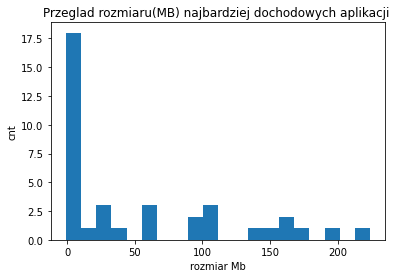

In [27]:
import matplotlib.pyplot as plt

plt.hist(df['Size'], bins=20)
plt.ylabel('cnt')
plt.xlabel('rozmiar Mb')
plt.title('Przeglad rozmiaru(MB) najbardziej dochodowych aplikacji ')

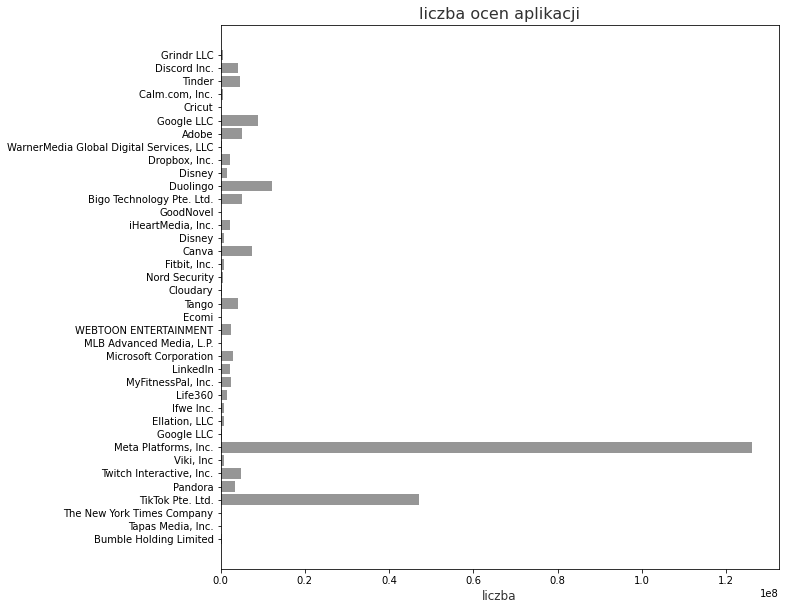

In [33]:

height = df['app_reviews']
bars = df['app_author']
y_pos = np.arange(len(height))
 
plt.figure(figsize=(10,10))
 #horyzontalny
plt.barh(y_pos, height, color = '#969696')  #plt.bar kolumnowy
  
plt.yticks(y_pos, bars)
 
plt.xlabel('liczba', fontsize=12, color='#323232')
plt.title('liczba ocen aplikacji', fontsize=16, color='#323232')
 
plt.show();

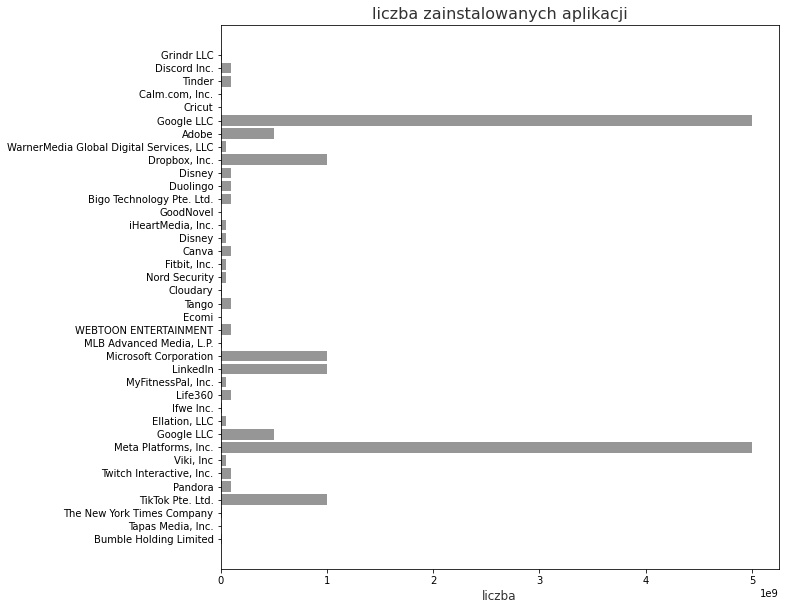

In [34]:

# Make a dataset:
height = df['Installs']
bars = df['app_author']
y_pos = np.arange(len(height))
 
plt.figure(figsize=(10,10))
 #horyzontalny
plt.barh(y_pos, height, color = '#969696')  #plt.bar kolumnowy
  
# Create names on the x-axis
plt.yticks(y_pos, bars)
 
plt.xlabel('liczba', fontsize=12, color='#323232')
plt.title('liczba zainstalowanych aplikacji', fontsize=16, color='#323232')
 
plt.show();


In [39]:
#komentarze

test = pd.json_normalize(json.loads(json.dumps(scrape_google_store_app())), record_path =['app_user_comments'], meta =['app_data'], errors='ignore')
test['app_name'] = pd.json_normalize(test['app_data'])['app_name']
test

,user_name,user_avatar,comment,user_app_rating,user__comment_likes,user_comment_published_at,user_comment_id,app_data,app_name
0,Joeby Wan Kenobi,https://play-lh.googleusercontent.com/a/AATXAJ...,The adverts are so god damn annoying. Tap to s...,1,19,2022-03-28 03:48:38,gp:AOqpTOHfindgOrwwNo2trQ_TbJ4Y4IC85b2YkUGUcLI...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
1,Amber McNaughton,https://play-lh.googleusercontent.com/a-/AOh14...,Grindr has simply gotten worse over time. Thes...,1,273,2022-03-30 14:39:24,gp:AOqpTOEGqcUa5VpJ2Z32OF3xxFf03rzi4woMgyzWSJN...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
2,Taricus,https://play-lh.googleusercontent.com/a-/AOh14...,"This app used to be decent, but has become mal...",1,29,2022-03-20 17:01:15,gp:AOqpTOHX279h4p6FDaIF_4smC8SOyZgQyJkOqIdVgs6...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
3,Lurch Penguin,https://play-lh.googleusercontent.com/a/AATXAJ...,"Profiles, such as they are, load about half th...",1,78,2022-03-29 21:37:42,gp:AOqpTOEUol6SMn3iJz476WZpve41CVS3xO91aI7GCcD...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
4,J GUERVIN,https://play-lh.googleusercontent.com/a-/AOh14...,This app used to be fun and the ads were toler...,1,5,2022-03-25 14:12:55,gp:AOqpTOEi2Zk5ChwEyomwumMrqcbAwITGGRY2_1UrKui...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
5,Pieter Els,https://play-lh.googleusercontent.com/a-/AOh14...,"Messages keeps failing to send, constantly nee...",1,46,2022-03-29 14:39:25,gp:AOqpTOFwmVUeuBVV41MJt1ZJ3OsQBkPfww8ecANV3EQ...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
6,Joe A,https://play-lh.googleusercontent.com/a-/AOh14...,For the last year (if not longer) messages wil...,1,132,2022-03-19 02:38:07,gp:AOqpTOFoDdmGtrmUGjNvG0CGO4hERJwYPAsqgbKrBpE...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
7,Cesar Augusto Moreno Molina,https://play-lh.googleusercontent.com/a-/AOh14...,What on earth is going on with these invasive ...,1,45,2022-03-22 18:32:23,gp:AOqpTOFnJCJtwNz1qvzUSxkNEw26bDwQIkYaZ9mFMJh...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
8,Justin Slater,https://play-lh.googleusercontent.com/a-/AOh14...,App is easy to use but the ads have gotten way...,1,7,2022-03-25 12:10:51,gp:AOqpTOE5f98j963TriwnSLcoimtqg5v6ONzTnRTNEyp...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
9,Jurriaan De Vink,https://play-lh.googleusercontent.com/a/AATXAJ...,I like how the app is organized and it is a ni...,2,0,2022-03-19 08:58:36,gp:AOqpTOHpdVitbgF8uLKV2Q_N-V6vkhRJELHyd_gdL7d...,"{'app_name': 'Grindr - Gay chat', 'app_type': ...",Grindr - Gay chat
